# SMI - Similarity of Matrices Index
SMI is a measure of the similarity between the dominant subspaces of two matrices. It comes in two flavours (projections): 
- OP - Orthogonal Projections, and 
- PR - Procrustes Rotations.  

The former (default) compares subspaces using ordinary least squares and can be formulated as the explained variance  when predicting one matrix subspace using the other matrix subspace. PR is a restriction where only rotation and scaling is allowed in the similarity calculations.  
  
Subspaces are by default computed using Principal Component Analysis (PCA). When the number of components extracted from one of the matrices is smaller than the other, the explained variance is calculate predicting the smaller subspace using the larger subspace.

## Example: Structured differences between random matrices
`X1` is a matrix of size (100 x 300) generated by drawing 300000 pseudo-random numbers before column centring.  
`X2` is a copy of matrix `X1` where the 3rd principal component has been omitted, by performing singular value decomposition on `X1` and constructing `X2` without the 3rd left and right singular vectors and without the 3rd singular value.

In [1]:
import numpy as np
import hoggorm as ho
    
X1 = ho.center(np.random.rand(100, 300))
U, s, V = np.linalg.svd(X1, 0)
X2 = np.dot(np.dot(np.delete(U, 2, 1), np.diag(np.delete(s, 2))), np.delete(V, 2, 0))
X1.shape

(100, 300)

### Orthogonal Projections
Removing the 3rd principal component from one of the matrices, one would expect that the first two components are exactly equal. The third component should yield an explained variance equal to the proportion explained, i.e. 2/3, while the following components will have an increasing proportion of explained variance (SMI). Rows correspond to the first matrix and collumns correspond to the second matrix in the prints below. An extra subspace dimension in `X1` will always cover the extra component in `X2`, while the lost component in `X2` can never be compensated for, thus the pattern below.

In [2]:
smiOP = ho.SMI(X1, X2, ncomp1=10, ncomp2=10)
print(np.round(smiOP.smi, 2))

[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   0.67 0.67 0.67 0.67 0.67 0.67 0.67 0.67]
 [1.   1.   1.   0.75 0.75 0.75 0.75 0.75 0.75 0.75]
 [1.   1.   1.   1.   0.8  0.8  0.8  0.8  0.8  0.8 ]
 [1.   1.   1.   1.   1.   0.83 0.83 0.83 0.83 0.83]
 [1.   1.   1.   1.   1.   1.   0.86 0.86 0.86 0.86]
 [1.   1.   1.   1.   1.   1.   1.   0.87 0.87 0.87]
 [1.   1.   1.   1.   1.   1.   1.   1.   0.89 0.89]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   0.9 ]]


A hypothesis can be made regarding the similarity of two subspaces where the null hypothesis is that they are equal and the alternative is that they are not. Permutation testing yields the following P-values (probabilities that the observed difference could be larger given the null hypothesis is true).

In [3]:
print(np.round(smiOP.significance(), 2))

[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   1.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   1.   1.   1.   0.   0.   0.   0.   0.   0.  ]
 [1.   1.   1.   1.   1.   0.   0.   0.   0.   0.  ]
 [1.   1.   1.   1.   1.   1.   0.   0.   0.   0.01]
 [1.   1.   1.   1.   1.   1.   1.   0.   0.01 0.06]
 [1.   1.   1.   1.   1.   1.   1.   1.   0.06 0.23]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   0.52]]


In [4]:
import hoggormplot as hop

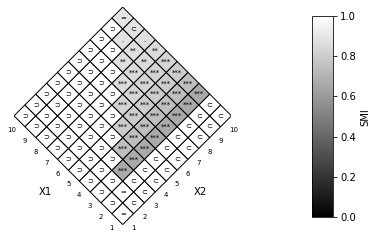

In [5]:
# import hoggormplot for plotting
#import hoggormplot as hop
hop.plotSMI(smiOP, [10, 10])

### Procrustes Rotations
The similarities using PR <= OP, and in this simple case OP$^2$ = PR. Otherwise the pattern stays the same.

In [6]:
smiPR = ho.SMI(X1, X2, ncomp1 = 10, ncomp2 = 10, projection = "Procrustes")
print(np.round(smiPR.smi, 2))

[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44]
 [1.   1.   1.   0.56 0.56 0.56 0.56 0.56 0.56 0.56]
 [1.   1.   1.   1.   0.64 0.64 0.64 0.64 0.64 0.64]
 [1.   1.   1.   1.   1.   0.69 0.69 0.69 0.69 0.69]
 [1.   1.   1.   1.   1.   1.   0.73 0.73 0.73 0.73]
 [1.   1.   1.   1.   1.   1.   1.   0.77 0.77 0.77]
 [1.   1.   1.   1.   1.   1.   1.   1.   0.79 0.79]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   0.81]]


The number of permutations can be controlled for quick (100) or accurate (>10000) computations of significance.

In [7]:
print(np.round(smiPR.significance(B = 100)))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]


### Custom subspace
Instead of the PCA subspaces automatically used, one can supply a custom subspace, e.g. scores from Partial Least Squares, in the following way (here just copying the original scores from above):

In [8]:
smiCustom = ho.SMI(X1, X2, ncomp1=10, ncomp2=10, Scores1=U)

_Reference:_   
Ulf Geir Indahl, Kristian Hovde Liland, Tormod Næs,  
A similarity index for comparing coupled matrices  
Journal of Chemometrics 32(e3049), (2018).